<a href="https://colab.research.google.com/github/microize/Hackathons/blob/main/jobathon_may_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem**

**Task:** To Identify the potential customer to cross sell the credit Cards

**Machine Learning Problem :** Classification

**Evaluation Metrics :** ROC AUC Score

# **Basic EDA**

In [43]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# altering The display option
pd.set_option('display.max_rows',None)
pd.set_option('display.max_Columns',None)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
# reading the data
subm_df = pd.read_csv('/content/drive/MyDrive/Data-colab/jobathon-may_2021/sample_submission_eyYijxG.csv',index_col='ID')
test_df = pd.read_csv('/content/drive/MyDrive/Data-colab/jobathon-may_2021/test_mSzZ8RL.csv',index_col='ID')
core_df = pd.read_csv('/content/drive/MyDrive/Data-colab/jobathon-may_2021/train_s3TEQDk.csv',index_col='ID')

In [45]:
core_df.head(2)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0


**Column description**

1. ID                  - Unique Identifier for a row
2. Gender              - Gender of the Customer
3. Age                 - Age of the Customer (in Years)
4. Region_Code         - Code of the Region for the customers
5. Occupation          - Occupation Type for the customer
6. Channel_Code        - Acquisition Channel Code for the Customer  (Encoded)
7. Vintage             - Vintage for the Customer (In Months)
8. Credit_Product      - If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)
9. Avg_Account_Balance - Average Account Balance for the Customer in last 12 Months
10. Is_Active           - If the Customer is Active in last 3 Months
11. Is_Lead(Target)     - If the Customer is interested for the Credit Card 
( 0 : Customer is not interested, 1 : Customer is interested)

In [46]:
print("Train Dataset has {} Rows and {} Columns".format(core_df.shape[0],core_df.shape[1]))

Train Dataset has 245725 Rows and 10 Columns


In [47]:
print("Test Dataset has {} Rows and {} Columns".format(test_df.shape[0],test_df.shape[1]))

Test Dataset has 105312 Rows and 9 Columns


In [48]:
# check Data types and Null Values
core_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245725 entries, NNVBBKZB to BOCZSWLJ
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 20.6+ MB


In [49]:
core_df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [50]:
cat_col = core_df.select_dtypes(exclude=['int64'])
print(cat_col.columns)

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')


In [51]:
def info_column(column):
    """Purpose : To print No of Unique Value, Unique Values, and No of Observations in each unique Values"""
    print(column)
    print(core_df[column].nunique())
    print(core_df[column].unique())
    print(core_df[column].value_counts())
    print(core_df[column].value_counts(normalize=True)*100)
    print('**********************')
    print('                      ')

In [52]:
for col in cat_col:
    info_column(col)

Gender
2
['Female' 'Male']
Male      134197
Female    111528
Name: Gender, dtype: int64
Male      54.612677
Female    45.387323
Name: Gender, dtype: float64
**********************
                      
Region_Code
35
['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG

In [53]:
# Target Value distribution
display(core_df['Is_Lead'].value_counts())
display(core_df['Is_Lead'].value_counts(normalize=True)*100)

0    187437
1     58288
Name: Is_Lead, dtype: int64

0    76.279174
1    23.720826
Name: Is_Lead, dtype: float64

In [54]:
# log Transformation 
"""core_df['Avg_Account_Balance'] = np.log1p(core_df['Avg_Account_Balance'])
test_df['Avg_Account_Balance'] = np.log1p(test_df['Avg_Account_Balance'])"""

"core_df['Avg_Account_Balance'] = np.log1p(core_df['Avg_Account_Balance'])\ntest_df['Avg_Account_Balance'] = np.log1p(test_df['Avg_Account_Balance'])"

1. Train Data - 2,45,725 observations
2. Test Data - 1,05,312 observations
3. 'Credit_Product' column has null values
4. 'Gender', Region_Code', 'Occupation', 'Channel_Code','Credit_Product','Is_Active' - These column are categorical column.
5. Customer Age spreads from 23 to 85. More than 75% of Customers are below 54 Age.
6. More Than 75 % customers have Vintage less than 6 years.
7. Target Value is Imbalanced.
8. 'Avg_Account_Balance' column is Skewed.


# **Benchmark Model**

**PreProcessing Data**

In [55]:
# dictionaries for Label encoding
gen_dic = {'Female':0,'Male':1}
occ_dic = {'Other':0,'Salaried':1,'Self_Employed':2,'Entrepreneur':3}
cha_dic = {'X3':3, 'X1':1, 'X2':2, 'X4':4}
cre_dic = {'No':0,'Yes':1}
isa_dic = {'No':0,'Yes':1}

def label_enc(df):
  """Purpose : Contains Preprocessing Step"""
  df['Gender'] = df['Gender'].map(gen_dic)
  df['Occupation'] = df['Occupation'].map(occ_dic)
  df['Channel_Code'] = df['Channel_Code'].map(cha_dic)
  df['Credit_Product'] = df['Credit_Product'].map(cre_dic)
  df['Is_Active'] = df['Is_Active'].map(isa_dic)
  df['Region_Code']=df['Region_Code'].str.replace('RG','').astype('int64')
  df.fillna(-1000,inplace=True)
  
core_df['Vintage'] = core_df['Vintage']/12
test_df['Vintage'] = test_df['Vintage']/12

# Copying dataframe
core_df_pre = core_df.copy()
test_df_pre = test_df.copy()

# encoding and filling Missing Values
label_enc(core_df_pre)
label_enc(test_df_pre)

# Changing Data type
core_df_pre['Credit_Product'] = pd.to_numeric(core_df_pre['Credit_Product'])
test_df_pre['Credit_Product'] = pd.to_numeric(test_df_pre['Credit_Product'])

core_df_pre['Credit_Product'].value_counts()

 0.0       144357
 1.0        72043
-1000.0     29325
Name: Credit_Product, dtype: int64

In [56]:
# OHE & Label Encoding on Dataset
"""from sklearn.preprocessing import LabelEncoder
core_df['Credit_Product']=core_df['Credit_Product'].astype(str)
def l_enc(df,df2,column):
    l_enc = LabelEncoder()
    df[column]= l_enc.fit_transform(df[column])
    df2[column]= l_enc.fit_transform(df2[column])

le = LabelEncoder()
core_df['Gender']= le.fit_transform(core_df['Gender'])
core_df['Occupation']= le.fit_transform(core_df['Occupation'])
core_df['Credit_Product']= le.fit_transform(core_df['Credit_Product'])
core_df['Vintage']= le.fit_transform(core_df['Vintage'])
core_df['Region_Code']= le.fit_transform(core_df['Region_Code'])
core_df['Channel_Code']= le.fit_transform(core_df['Channel_Code'])
core_df['Age']= le.fit_transform(core_df['Age'])
core_df['Is_Lead']= le.fit_transform(core_df['Is_Lead'])
core_df['Is_Active']= le.fit_transform(core_df['Is_Active'])
core_df['ID']= le.fit_transform(core_df['ID'])"""

"""core_df_pre = pd.concat([core_df_pre,pd.get_dummies(core_df_pre['Region_Code'],prefix='RC',drop_first=True),
                         pd.get_dummies(core_df_pre['Occupation'],prefix='oc',drop_first=True),
                         pd.get_dummies(core_df_pre['Credit_Product'],prefix='cp',drop_first=True),
                         pd.get_dummies(core_df_pre['Channel_Code'],prefix='cc',drop_first=True),
                         ], axis=1).drop(['Region_Code','Occupation','Credit_Product','Channel_Code'], axis=1)

test_df_pre = pd.concat([test_df_pre,pd.get_dummies(test_df_pre['Region_Code'],prefix='RC',drop_first=True),
                         pd.get_dummies(test_df_pre['Occupation'],prefix='oc',drop_first=True),
                         pd.get_dummies(test_df_pre['Credit_Product'],prefix='cp',drop_first=True),
                         pd.get_dummies(test_df_pre['Channel_Code'],prefix='cc',drop_first=True),
                         ], axis=1).drop(['Region_Code','Occupation','Credit_Product','Channel_Code'], axis=1)"""

"core_df_pre = pd.concat([core_df_pre,pd.get_dummies(core_df_pre['Region_Code'],prefix='RC',drop_first=True),\n                         pd.get_dummies(core_df_pre['Occupation'],prefix='oc',drop_first=True),\n                         pd.get_dummies(core_df_pre['Credit_Product'],prefix='cp',drop_first=True),\n                         pd.get_dummies(core_df_pre['Channel_Code'],prefix='cc',drop_first=True),\n                         ], axis=1).drop(['Region_Code','Occupation','Credit_Product','Channel_Code'], axis=1)\n\ntest_df_pre = pd.concat([test_df_pre,pd.get_dummies(test_df_pre['Region_Code'],prefix='RC',drop_first=True),\n                         pd.get_dummies(test_df_pre['Occupation'],prefix='oc',drop_first=True),\n                         pd.get_dummies(test_df_pre['Credit_Product'],prefix='cp',drop_first=True),\n                         pd.get_dummies(test_df_pre['Channel_Code'],prefix='cc',drop_first=True),\n                         ], axis=1).drop(['Region_Code','Occupation','C

**Model**

In [57]:
 # installing CatBoost and Lightgbm
 !pip3 install catboost
 !pip install lightgbm

In [58]:
# importing lbraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
import catboost as cb
import lightgbm as lgb

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score, precision_score, recall_score 
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [59]:
# assigning X and y
X = core_df_pre.drop(['Is_Lead'],axis=1)
y = core_df_pre['Is_Lead']

# Data Split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.10,random_state=1425,stratify=y)

In [60]:
# appliying data to different Models with default Parameters
model_list = {'Random Forest Classifier':RandomForestClassifier(),
              'GradientBoostingClassifier':GradientBoostingClassifier(),
              'AdaBoostClassifier':AdaBoostClassifier(),
              'DecisionTreeClassifier':DecisionTreeClassifier(),
              'CatBoost':cb.CatBoostClassifier(verbose=0),
              'XGBoost':xgb.XGBClassifier(class_weight='balanced'),
              'LGBM':lgb.LGBMClassifier(class_weight='balanced')}
model_perfomance ={}
for ind_model in model_list.items():
  b_model = ind_model[1]
  b_model.fit(X_train,y_train)
  y_pre = b_model.predict_proba(X_val)[:,1]
  roc_score = roc_auc_score(y_val,y_pre)
  model_perfomance[ind_model[0]] = {'roc':roc_score,'feature_importance':[x for x in zip(X_train.columns,(b_model.feature_importances_)*100)]}

mod_dic ={}
for y in model_perfomance.items():
  print(y[0]) 
  for x in y[1].items():
    if x[0] == 'roc':
      print('     ')
      print('ROC:',x[1])
      print('     ')
    else:
      for z in x[1]:
        print(z[0],':',z[1])
  print('     ')
  print('==='*6)
  print('     ')

Random Forest Classifier
     
ROC: 0.8569423567402952
     
Gender : 1.4816995953838652
Age : 13.474006342130659
Region_Code : 9.583687801436742
Occupation : 3.067474725962285
Channel_Code : 4.610117718491606
Vintage : 13.807297592408375
Credit_Product : 29.431099148037465
Avg_Account_Balance : 23.243897321637974
Is_Active : 1.3007197545110212
     
     
GradientBoostingClassifier
     
ROC: 0.8726166399667519
     
Gender : 0.018415487635244292
Age : 2.7160792977382524
Region_Code : 0.015353345580118003
Occupation : 4.640268398902646
Channel_Code : 0.8986829272106533
Vintage : 6.150088466509626
Credit_Product : 83.1038606666787
Avg_Account_Balance : 0.03469363263335363
Is_Active : 2.4225577771114177
     
     
AdaBoostClassifier
     
ROC: 0.8649721739515003
     
Gender : 2.0
Age : 24.0
Region_Code : 0.0
Occupation : 26.0
Channel_Code : 6.0
Vintage : 32.0
Credit_Product : 6.0
Avg_Account_Balance : 2.0
Is_Active : 2.0
     
     
DecisionTreeClassifier
     
ROC: 0.7073433442087985

These Models provides higher ROC Score with Default hyperparameters.
* Random Forest Classifier
* GradientBoostingClassifier
* AdaBoostClassifier
* DecisionTreeClassifier
* CatBoost
* XGBoost
* LGBM

LGBM Model gives High Score.


In [61]:
# Creating Model
model = lgb.LGBMClassifier(class_weight='balanced',max_depth=5, n_estimators=90)

In [62]:
# Randomised Search CV
param_distributions={'n_estimators':[90, 100, 300, 500],'max_depth':[3,5,7]}
grid_model = RandomizedSearchCV(model,param_distributions=param_distributions,scoring='accuracy',cv=10)
grid_model.fit(X_train,y_train)
y_pre_1 = grid_model.predict_proba(X_val)[:,1]
roc_score = roc_auc_score(y_val,y_pre_1)
print(roc_score)

0.8722347255656608


In [82]:
# best Parameters
grid_model.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=5, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [81]:
# best Parameters
grid_model.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [63]:
#y_pre_test_1 = grid_model.predict_proba(test_df_pre)[:,1]

In [64]:
"""model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pre_2 = model.predict_proba(X_val)[:,1]
roc_score = roc_auc_score(y_val,y_pre_2)
print(roc_score)"""

'model = GradientBoostingClassifier()\nmodel.fit(X_train,y_train)\ny_pre_2 = model.predict_proba(X_val)[:,1]\nroc_score = roc_auc_score(y_val,y_pre_2)\nprint(roc_score)'

In [65]:
#y_pre_test_2 = model.predict_proba(test_df_pre)[:,1]

In [66]:
"""model = xgb.XGBClassifier(class_weight='balanced')
model.fit(X_train,y_train)
y_pre_3 = model.predict_proba(X_val)[:,1]
roc_score = roc_auc_score(y_val,y_pre_3)
print(roc_score)"""

"model = xgb.XGBClassifier(class_weight='balanced')\nmodel.fit(X_train,y_train)\ny_pre_3 = model.predict_proba(X_val)[:,1]\nroc_score = roc_auc_score(y_val,y_pre_3)\nprint(roc_score)"

In [67]:
#y_pre_test_3 = model.predict_proba(test_df_pre)[:,1]

In [68]:
"""model = cb.CatBoostClassifier(verbose=0)
model.fit(X_train,y_train)
y_pre_4 = model.predict_proba(X_val)[:,1]
roc_score = roc_auc_score(y_val,y_pre_4)
print(roc_score)"""

'model = cb.CatBoostClassifier(verbose=0)\nmodel.fit(X_train,y_train)\ny_pre_4 = model.predict_proba(X_val)[:,1]\nroc_score = roc_auc_score(y_val,y_pre_4)\nprint(roc_score)'

In [69]:
#y_pre_test_4 = model.predict_proba(test_df_pre)[:,1]

In [70]:
"""model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pre_5 = model.predict_proba(X_val)[:,1]
roc_score = roc_auc_score(y_val,y_pre_5)
print(roc_score)"""

'model = RandomForestClassifier()\nmodel.fit(X_train,y_train)\ny_pre_5 = model.predict_proba(X_val)[:,1]\nroc_score = roc_auc_score(y_val,y_pre_5)\nprint(roc_score)'

In [71]:
#y_pre_test_5 = model.predict_proba(test_df_pre)[:,1]

In [72]:
"""y_pre = (y_pre_1+y_pre_2+y_pre_3+y_pre_4+y_pre_5)/5

roc_score = roc_auc_score(y_val,y_pre)
print(roc_score)"""

'y_pre = (y_pre_1+y_pre_2+y_pre_3+y_pre_4+y_pre_5)/5\n\nroc_score = roc_auc_score(y_val,y_pre)\nprint(roc_score)'

In [73]:
#y_test_pre = (y_pre_test_1+y_pre_test_2+y_pre_test_3+y_pre_test_4+y_pre_test_5)/5

In [74]:
"""for x in zip(X.columns,model.feature_importances_):
  print(x)"""

'for x in zip(X.columns,model.feature_importances_):\n  print(x)'

In [75]:
# Creating Output.csv
y_test_pre = grid_model.predict_proba(test_df_pre)[:,1]
test_df_pre['Is_Lead'] = y_test_pre
test_df_pre['Is_Lead'].to_csv('output.csv')

# **Failed Approaches**
* Binning on 'Avg_Account_Balance' and 'Age' Column.
* Balancing the Target Variable throughOversamling -SMOTE.
* Log Transform on 'Avg_Account_Balance'.
* Different Compinations of Input Features
* Blended Models (Xgboost + CatBoost + Lgbm + GradientBoost)

# Best Model 
Light GBM Model: 
* LGBMClassifier
              (boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=5, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

This Model gave best score of 0.8727313400(Public Leaderboard) and 0.8729829080(Private Leaderboard)

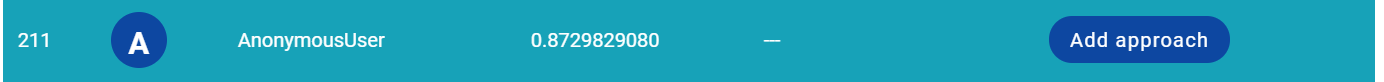